<a href="https://colab.research.google.com/github/Saumya40-codes/Machine_Learning/blob/main/ML_kickstart.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler

from imblearn.over_sampling import RandomOverSampler

In [3]:
cols = ["fLength","fWidth","fSize","Fconc","fConc1","fAsym","fM3Long","fM3Trans","fAlpha","fDist","class"]
df = pd.read_csv("magic04.data",names=cols)
df.head()   #first five
df

,fLength,fWidth,fSize,Fconc,fConc1,fAsym,fM3Long,fM3Trans,fAlpha,fDist,class
0,28.7967,16.0021,2.6449,0.3918,0.1982,27.7004,22.0110,-8.2027,40.0920,81.8828,g
1,31.6036,11.7235,2.5185,0.5303,0.3773,26.2722,23.8238,-9.9574,6.3609,205.2610,g
2,162.0520,136.0310,4.0612,0.0374,0.0187,116.7410,-64.8580,-45.2160,76.9600,256.7880,g
3,23.8172,9.5728,2.3385,0.6147,0.3922,27.2107,-6.4633,-7.1513,10.4490,116.7370,g
4,75.1362,30.9205,3.1611,0.3168,0.1832,-5.5277,28.5525,21.8393,4.6480,356.4620,g
...,...,...,...,...,...,...,...,...,...,...,...
19015,21.3846,10.9170,2.6161,0.5857,0.3934,15.2618,11.5245,2.8766,2.4229,106.8258,h
19016,28.9452,6.7020,2.2672,0.5351,0.2784,37.0816,13.1853,-2.9632,86.7975,247.4560,h
19017,75.4455,47.5305,3.4483,0.1417,0.0549,-9.3561,41.0562,-9.4662,30.2987,256.5166,h
19018,120.5135,76.9018,3.9939,0.0944,0.0683,5.8043,-93.5224,-63.8389,84.6874,408.3166,h


In [7]:
# df['class'].unique()    #g == gamma , h == hydrons  as it can become hard to deal with letters we'll convert it to int
df["class"] = (df["class"] == 'g').astype(int)  # if g then 1 else 0
df

,fLength,fWidth,fSize,Fconc,fConc1,fAsym,fM3Long,fM3Trans,fAlpha,fDist,class
0,28.7967,16.0021,2.6449,0.3918,0.1982,27.7004,22.0110,-8.2027,40.0920,81.8828,1
1,31.6036,11.7235,2.5185,0.5303,0.3773,26.2722,23.8238,-9.9574,6.3609,205.2610,1
2,162.0520,136.0310,4.0612,0.0374,0.0187,116.7410,-64.8580,-45.2160,76.9600,256.7880,1
3,23.8172,9.5728,2.3385,0.6147,0.3922,27.2107,-6.4633,-7.1513,10.4490,116.7370,1
4,75.1362,30.9205,3.1611,0.3168,0.1832,-5.5277,28.5525,21.8393,4.6480,356.4620,1
...,...,...,...,...,...,...,...,...,...,...,...
19015,21.3846,10.9170,2.6161,0.5857,0.3934,15.2618,11.5245,2.8766,2.4229,106.8258,0
19016,28.9452,6.7020,2.2672,0.5351,0.2784,37.0816,13.1853,-2.9632,86.7975,247.4560,0
19017,75.4455,47.5305,3.4483,0.1417,0.0549,-9.3561,41.0562,-9.4662,30.2987,256.5166,0
19018,120.5135,76.9018,3.9939,0.0944,0.0683,5.8043,-93.5224,-63.8389,84.6874,408.3166,0


In [ ]:
# headings are known as features
#feature in one sample == feature vector
#Outcome == target vector

"""

L1 Loss

kinda far away ( as we see a straght line)
loss = sum  (|real-predicted|)

L2


loss = sum  ((real-predicted)^2)
"""
"""
(1) Qualitative Data
Nominal Data   (gender)
Ordinal Data   (rating system)

(2)
Quantitative Data   could be discrete or continuous


Classification   - predict discrete classes

Multiclass Classification
Binary Classification

Regression - predicts continuous values
stock price tommorrow  or price of a house in 2 months

Less Loss == best performance
"""

'\n(1) Qualitative Data\nNominal Data   (gender)\nOrdinal Data   (rating system)\n\n(2)\nQuantitative Data   could be discrete or continuous\n\n\nClassification   - predict discrete classes\n\nMulticlass Classification\nBinary Classification\n\nRegression - predicts continuous values\nstock price tommorrow  or price of a house in 2 months\n\nLess Loss == best performance\n'

/usr/local/lib/python3.9/dist-packages/numpy/lib/histograms.py:906: RuntimeWarning: invalid value encountered in true_divide
  return n/db/n.sum(), bin_edges


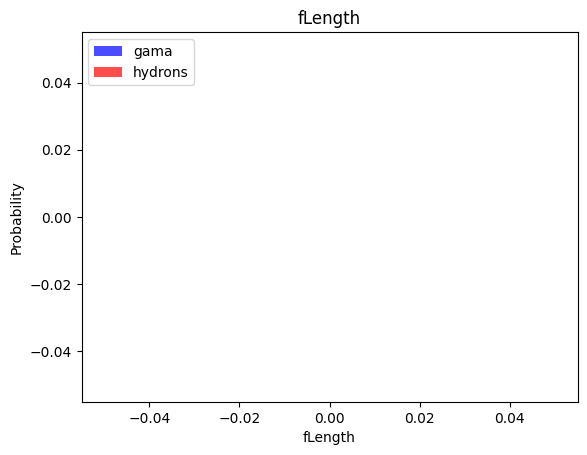

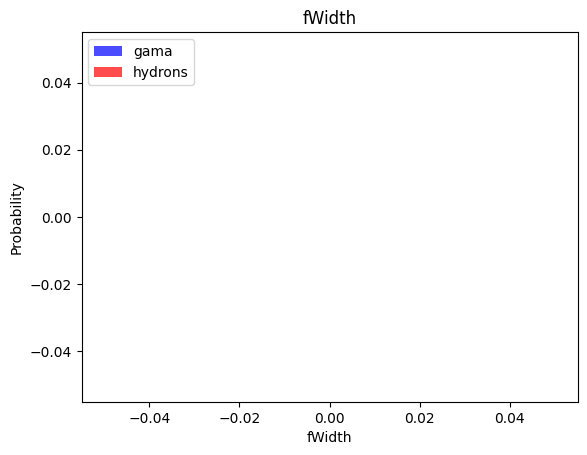

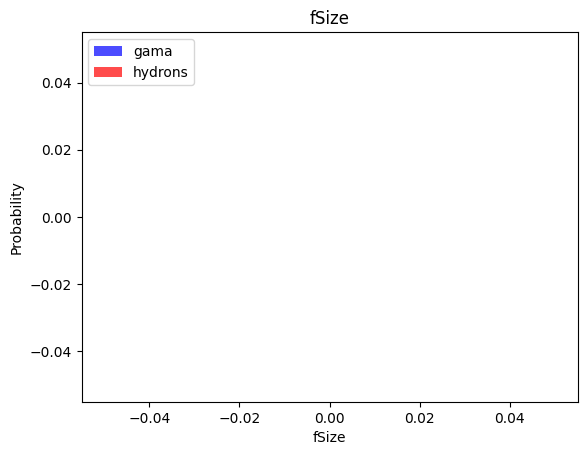

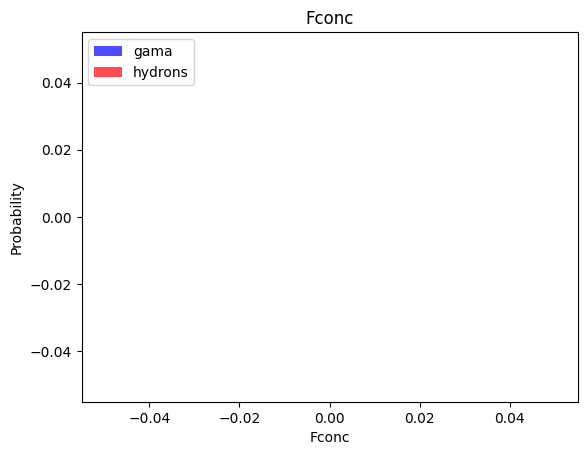

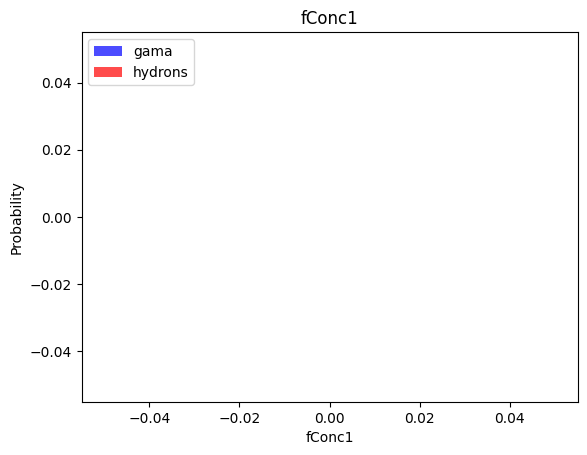

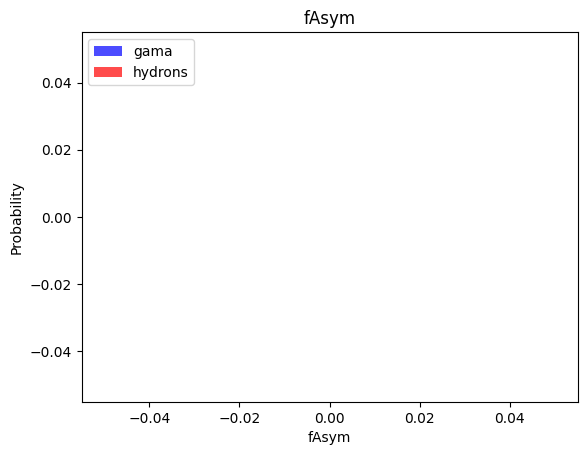

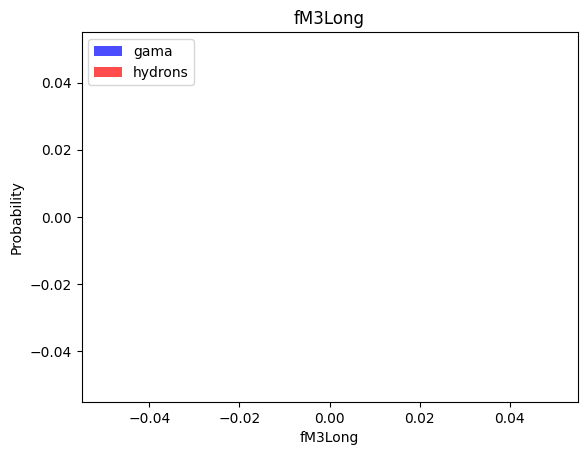

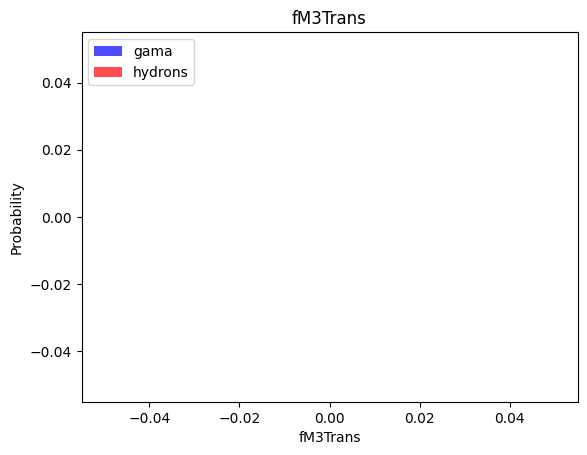

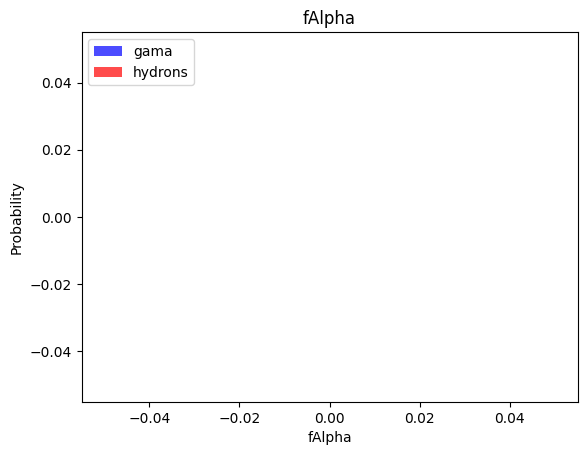

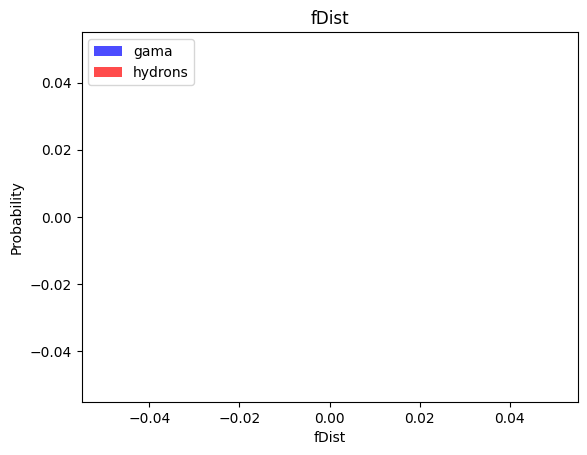

In [6]:
for label in cols[:len(cols)-1]:
  plt.hist(df[df["class"]==1][label] , color = "blue", label="gama",alpha = 0.7 , density = True)
  plt.hist(df[df["class"]==0][label] , color = "red" , label = "hydrons",alpha = 0.7 , density = True)
  plt.title(label)
  plt.ylabel("Probability")
  plt.xlabel(label)
  plt.legend()

  plt.show()

TEST , VALIDATION AND TRAIN

In [53]:
train, valid, test = np.split(df.sample(frac=1), [ int(0.6*len(df)) , int(0.8*len(df))])

In [54]:
def scale_dataset(dataframe, oversample = False):
  x = dataframe[dataframe.columns[:-1]].values
  y = dataframe[dataframe.columns[-1]].values

  scaler = StandardScaler()
  x = scaler.fit_transform(x)

  if oversample:
    ros = RandomOverSampler()
    x,y  = ros.fit_resample(x,y)

  data = np.hstack((x,np.reshape(y, (-1,1))))
  return x,y,data

In this data sample, the number of gama (1) might be more then that of hydron (0)

In [55]:
print(len(train[train["class"] == 1]))
print(len(train[train["class"] == 0]))


7344
4068


In [56]:
#After changes

train, X_train , Y_train = scale_dataset(train,oversample=True)
valid, X_valid , Y_valid = scale_dataset(valid,oversample=False)
test, X_test , Y_test = scale_dataset(test,oversample=False)


In [57]:
print(len(Y_train))

print(sum(Y_train == 1))
print(sum(Y_train == 0))

14688
[   0    0    0    0    0    0    0    0    0    0 7344]
[   0    0    0    0    0    0    0    0    0    0 7344]
